In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the dataset
df = pd.read_csv('../data/amazon_co-ecommerce_sample_cleaned_top_5.csv')

# Create a graph representation
G = nx.Graph()

for index, row in df.iterrows():
    G.add_node(row['product_name'])
    
    # Add edges based on "customers_who_bought_this_item_also_bought"
    also_bought = row['customers_who_bought_this_item_also_bought'].split(' > ')
    for item in also_bought:
        G.add_edge(row['product_name'], item)
        
    # Add edges based on "items_customers_buy_after_viewing_this_item"
    buy_after_viewing = row['items_customers_buy_after_viewing_this_item'].split(' > ')
    for item in buy_after_viewing:
        G.add_edge(row['product_name'], item)

# Compute PageRank
pagerank = nx.pagerank(G)
pagerank_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Identify communities using community detection
communities = list(nx.algorithms.community.label_propagation.asyn_lpa_communities(G))

# Create a dictionary to store product recommendations
recommendations = defaultdict(list)

# Recommend products based on PageRank and community detection
for i, (product, rank) in enumerate(pagerank_sorted):
    if i < 5:  # Recommend top 5 products based on PageRank
        recommendations[product].append(('PageRank', product))
        
    for community in communities:
        if product in community:
            for other_product in community:
                if other_product != product:
                    recommendations[product].append(('Community', other_product))
                    
# Print recommendations
for product, recommendations_list in recommendations.items():
    print(f"Recommendations for {product}:")
    for recommendation_type, recommended_product in recommendations_list:
        print(f"- {recommendation_type}: {recommended_product}")
    print()


Recommendations for Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model:
- PageRank: Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model
- Community: Hornby-Railroad-Transatlanic 
- Community: Hornby-R6368-RailRoad-Gauge-Brake
- Community: Hornby-R076-00-Gauge-Footbridge 
- Community: Hornby-R3064-RailRoad-Smokey-Locomotive 
- Community: Hornby-R2672-RailRoad-Caledonian 
- Community: Hornby-R8222-Gauge-Track-Extension
- Community: Hornby-R6371-RailRoad-Petrol-Tanker
- Community: Hornby-R6367-RailRoad-Gauge-Rolling

Recommendations for Hornby 2014 Catalogue:
- PageRank: Hornby 2014 Catalogue
- Community: Peco-60-Plans-Book
- Community: Hornby-Gloucester 
- Community: Hornby-Book-Model-Railways-Edition
- Community: Hornby-Book-Scenic-Railway-Modelling
- Community: Hornby-R8150-Catalogue-2015
- Community: Newcomers-Guide-Model-Railways-Step
- Community: Airfix-5014429781902

Recommendations for FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017

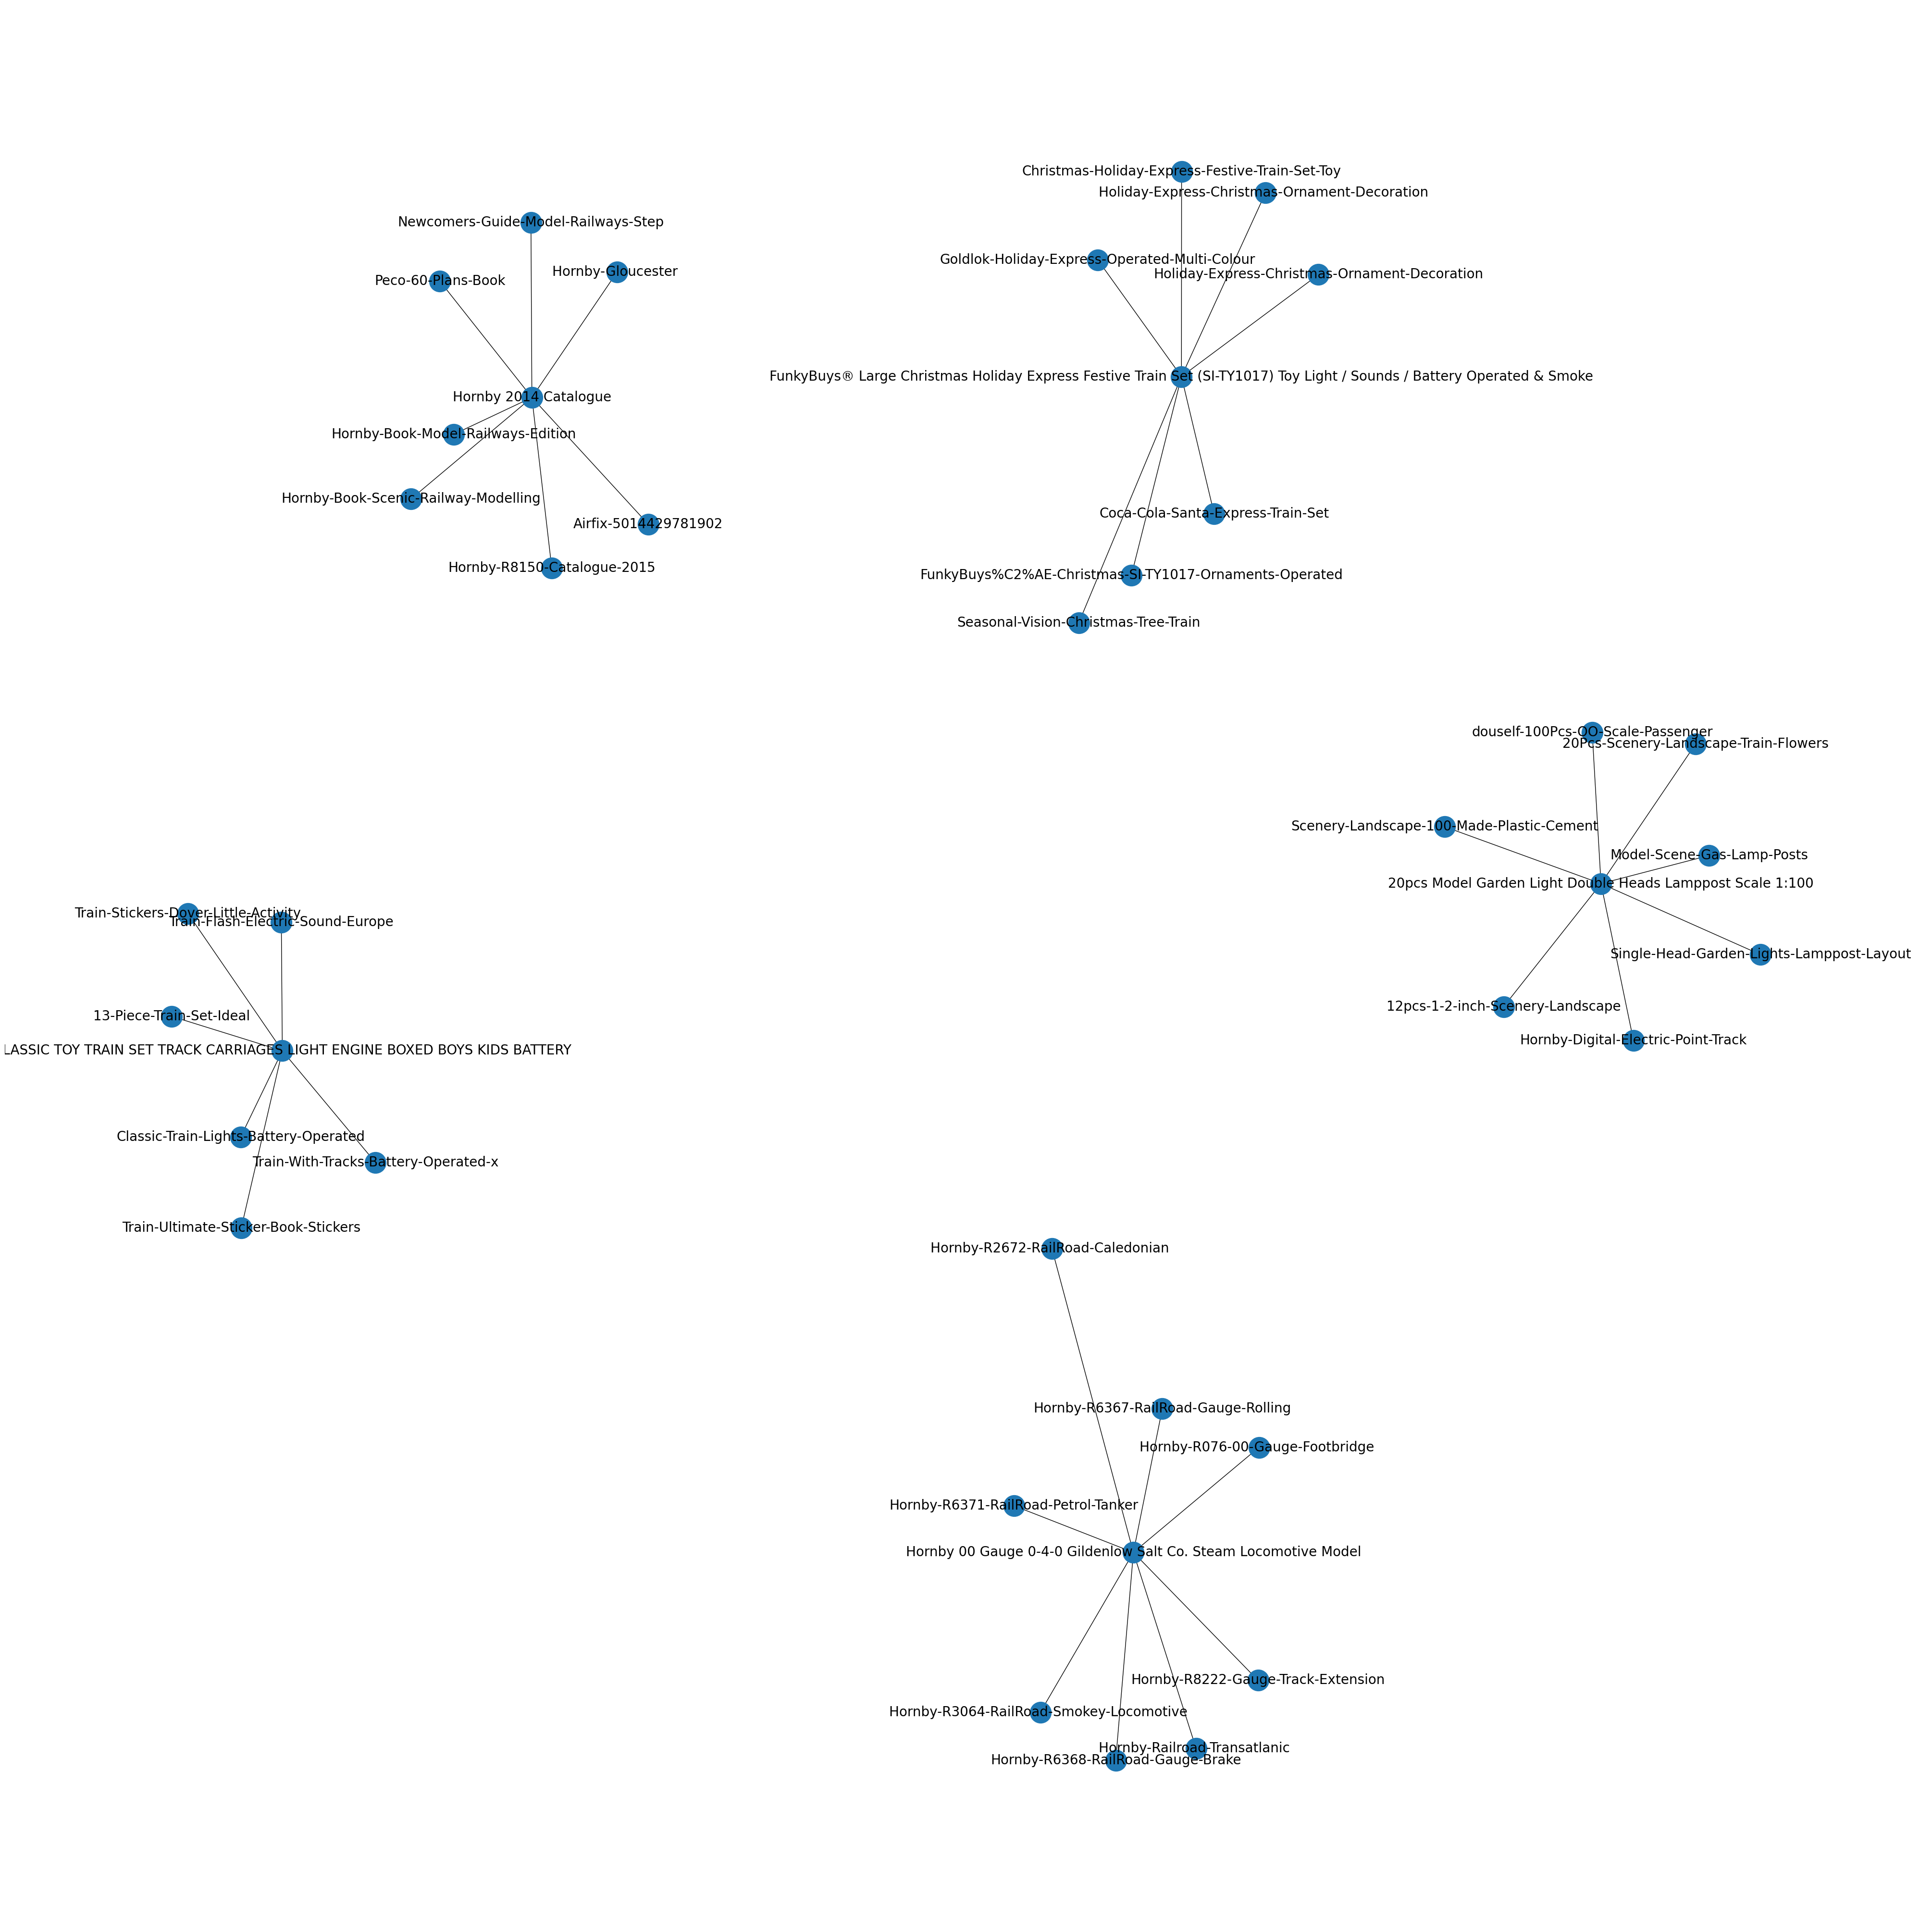

In [4]:
# visualize the graph with node labels
plt.figure(figsize=(40, 40))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, font_size=20, node_size=1000)
plt.show()

In [8]:

# # visualize the graph with communities
# plt.figure(figsize=(12, 12))
# colors = range(len(communities))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, node_color=colors, node_size=10, width=0.5, cmap=plt.cm.tab20)
# plt.show()

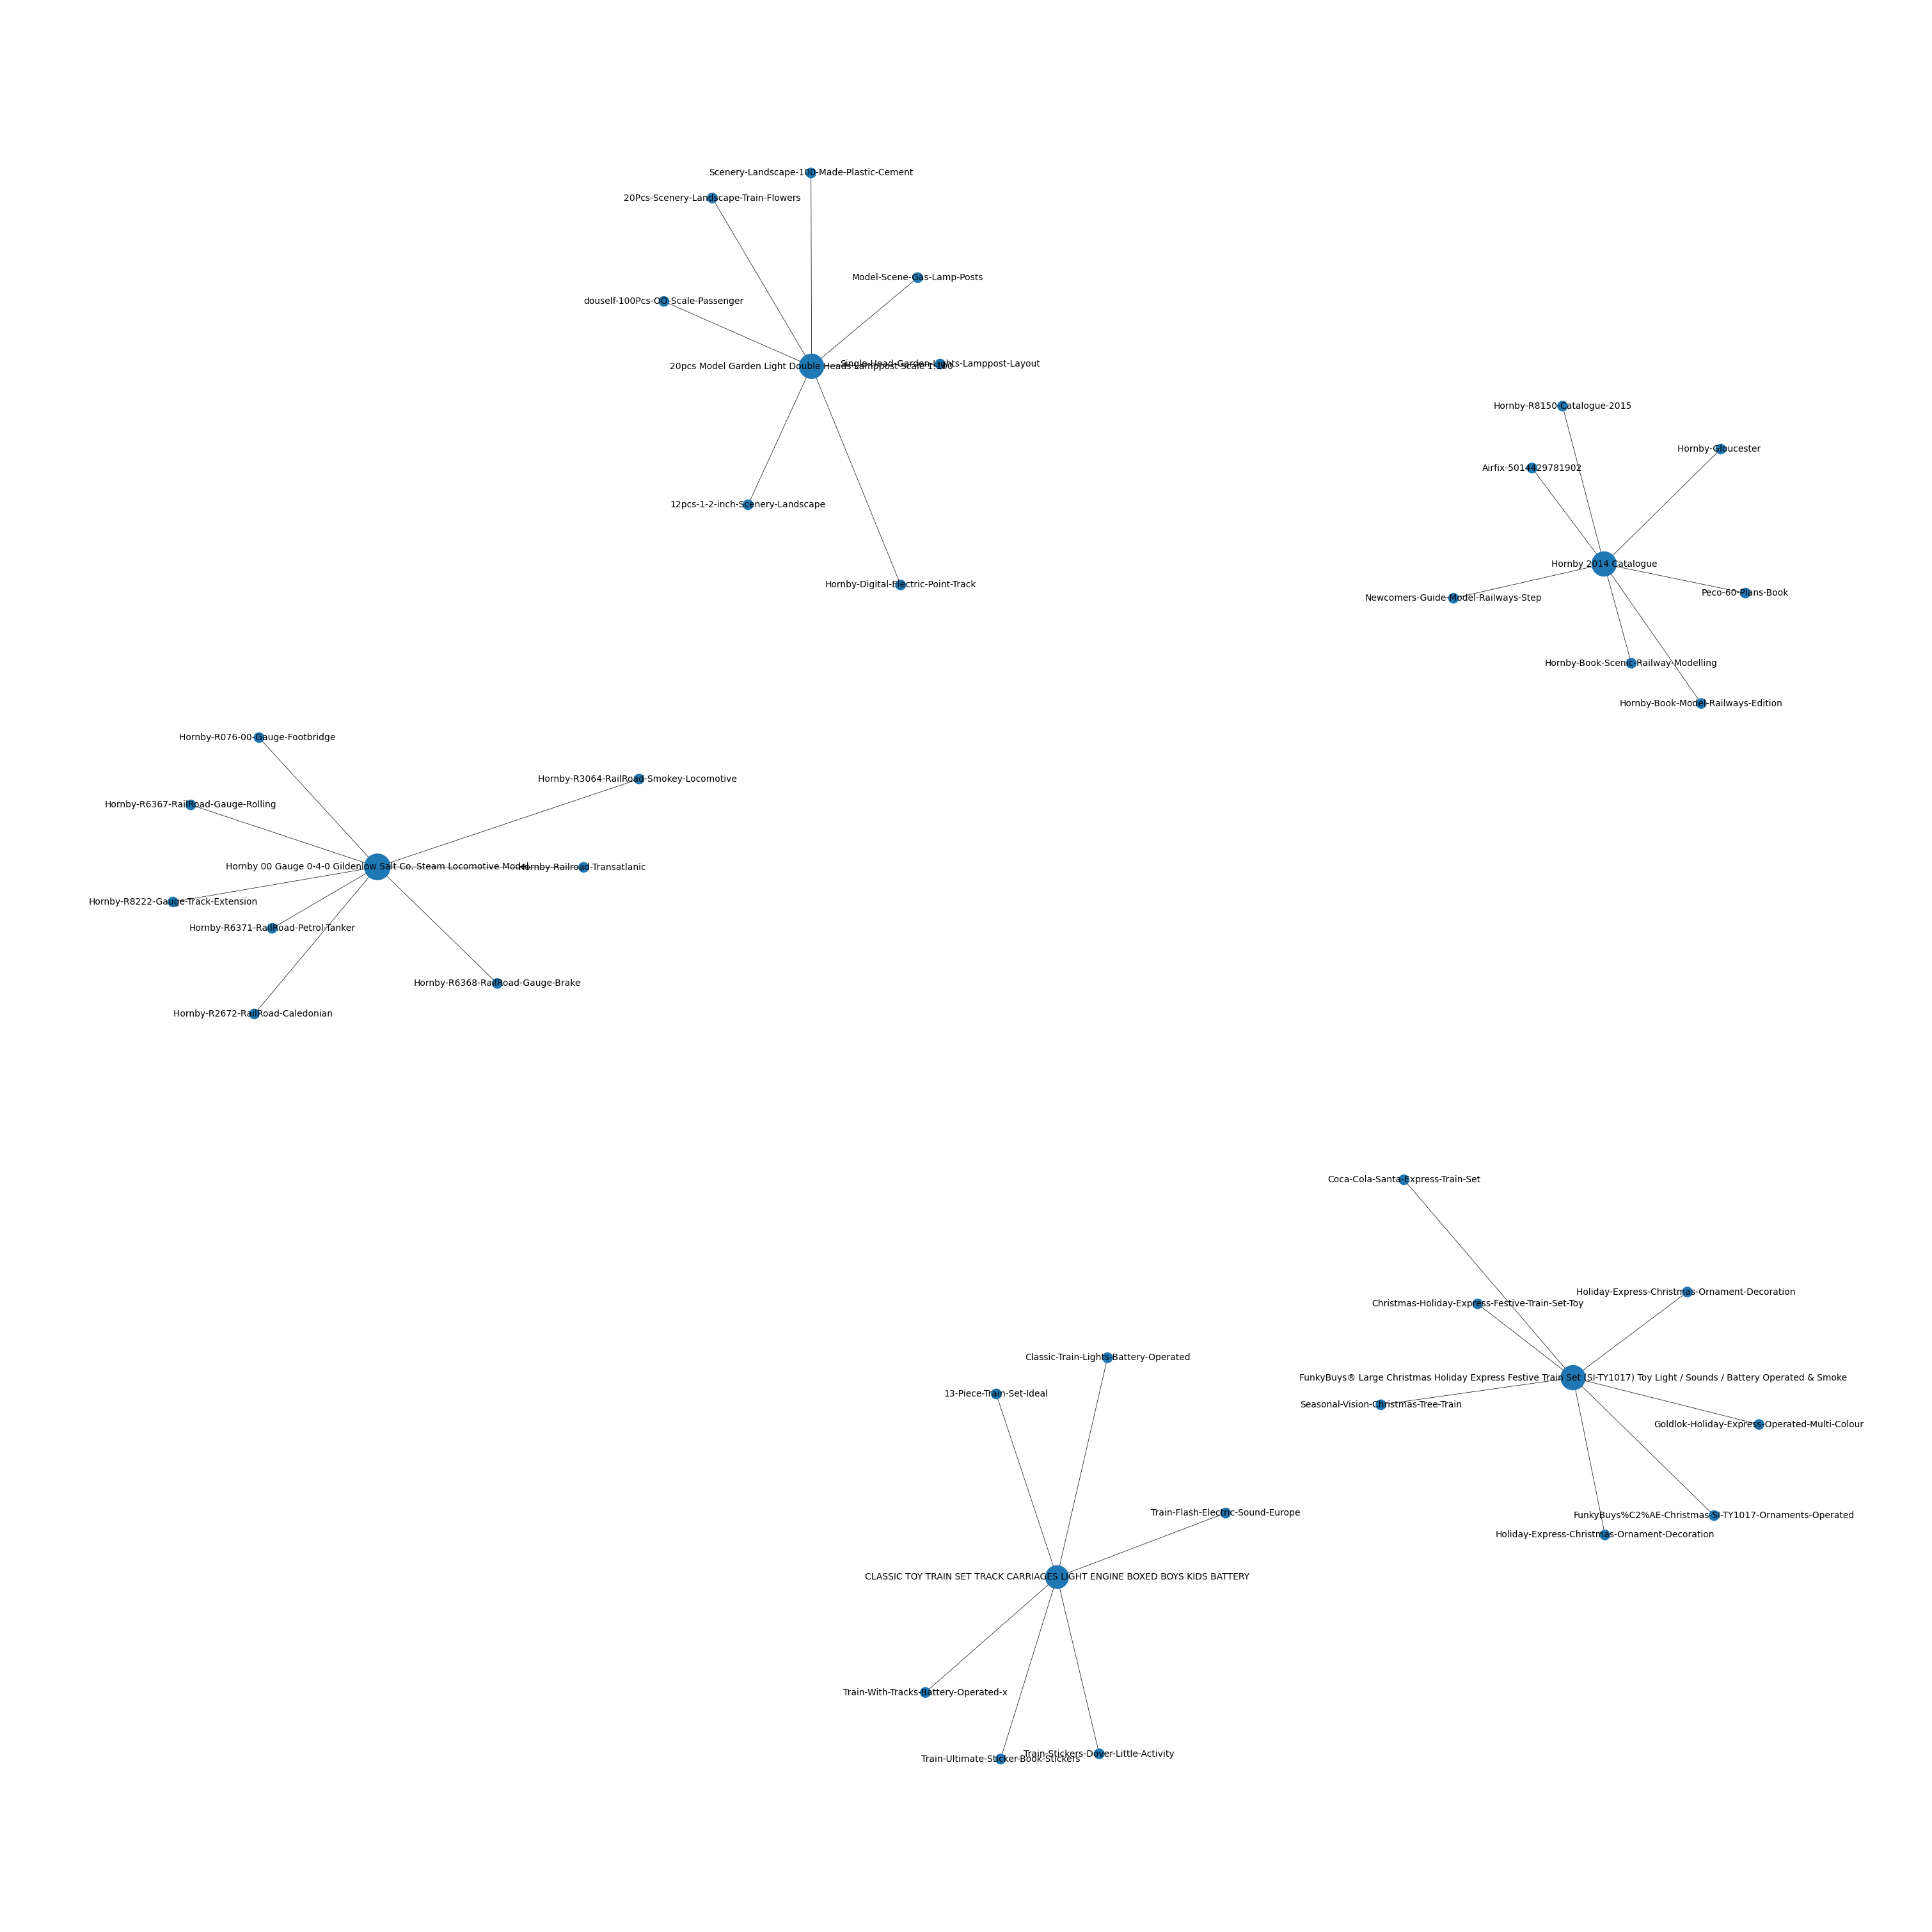

In [26]:

# visualize the graph with PageRank values
plt.figure(figsize=(30, 30))
node_size = [8000 * pagerank[node] for node in G]
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, node_size=node_size, width=0.5, cmap=plt.cm.viridis, with_labels=True, font_size=10)
plt.show()

In [20]:

# # visualize the graph with PageRank values and communities
# plt.figure(figsize=(12, 12))
# node_size = [5000 * pagerank[node] for node in G]
# colors = range(len(communities))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, node_color=colors, node_size=node_size, width=0.5, cmap=plt.cm.tab20)
# plt.show()


In [6]:
# # Visualize the overall graph
# pos = nx.spring_layout(G)
# plt.figure(figsize=(12, 8))
# nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
# plt.title('Overall Product Graph')
# plt.show()

In [9]:
# # Visualize the graph colored by PageRank
# pagerank = nx.pagerank(G)
# node_colors = [pagerank[node] for node in G.nodes()]
# plt.figure(figsize=(12, 8))
# sc = nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap='viridis', edge_color='gray', node_size=500, font_size=8)
# plt.title('Graph Colored by PageRank')
# plt.colorbar(sc)
# plt.show()

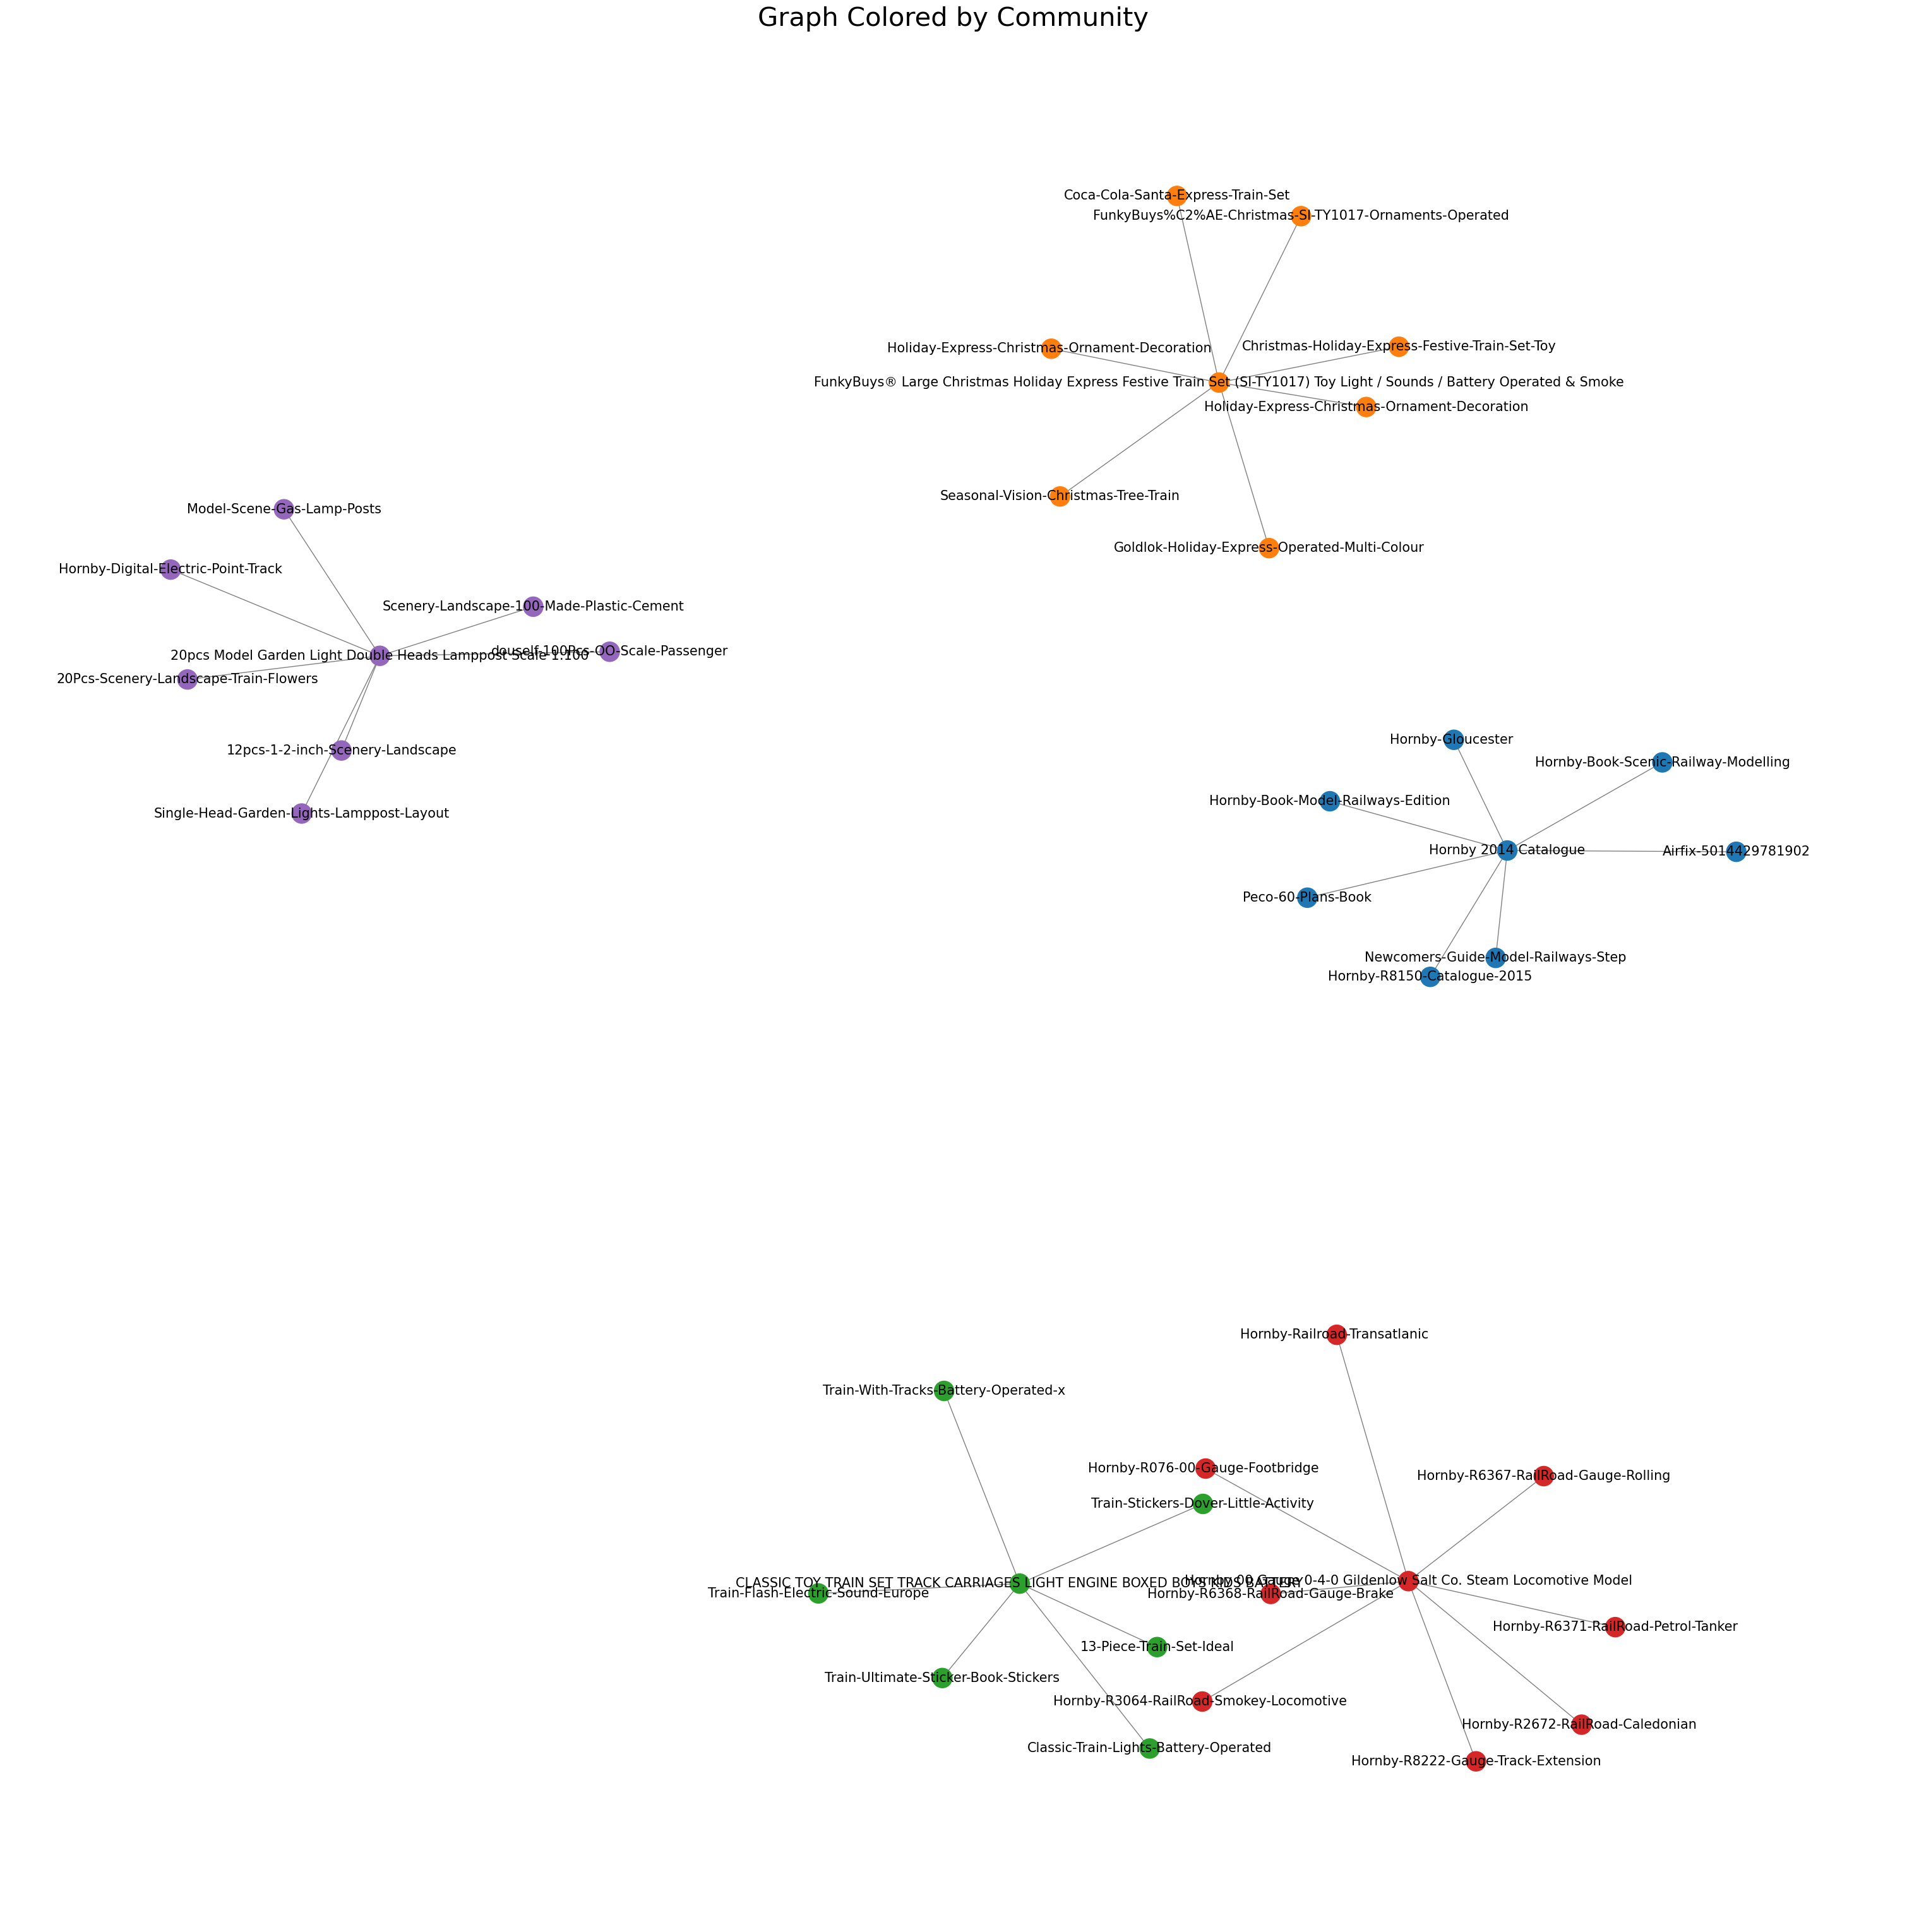

In [17]:

# Visualize the graph colored by community
node_colors = [f'C{i}' for i, community in enumerate(communities) for _ in community]
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=15)
plt.title('Graph Colored by Community', fontsize=30)
plt.show()

# Evaluation

In [30]:
from collections import defaultdict

def get_relevant_products(df_complete):
    """
    Extracts the list of relevant products for each product in the dataset.
    """
    relevant_products = defaultdict(set)

    for _, row in df_complete.iterrows():
        product = row['product_name']
        also_bought = row['customers_who_bought_this_item_also_bought'].split(' > ')
        buy_after_viewing = row['items_customers_buy_after_viewing_this_item'].split(' > ')

        relevant_products[product].update(also_bought)
        relevant_products[product].update(buy_after_viewing)

    return relevant_products

# Example usage
df_complete = pd.read_csv('../data/amazon_co-ecommerce_sample_cleaned.csv')
relevant_products = get_relevant_products(df_complete)

# Check the relevant products for a product
print(relevant_products['Hornby 2014 Catalogue'])

{'Peco-60-Plans-Book', 'Hornby-Gloucester ', 'Hornby-Book-Model-Railways-Edition', 'Hornby-Book-Scenic-Railway-Modelling', 'Hornby-R8150-Catalogue-2015', 'Newcomers-Guide-Model-Railways-Step', 'Airfix-5014429781902'}


In [33]:
recommendations

defaultdict(list,
            {'Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model': [('PageRank',
               'Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model'),
              ('Community', 'Hornby-Railroad-Transatlanic '),
              ('Community', 'Hornby-R6368-RailRoad-Gauge-Brake'),
              ('Community', 'Hornby-R076-00-Gauge-Footbridge '),
              ('Community', 'Hornby-R3064-RailRoad-Smokey-Locomotive '),
              ('Community', 'Hornby-R2672-RailRoad-Caledonian '),
              ('Community', 'Hornby-R8222-Gauge-Track-Extension'),
              ('Community', 'Hornby-R6371-RailRoad-Petrol-Tanker'),
              ('Community', 'Hornby-R6367-RailRoad-Gauge-Rolling')],
             'Hornby 2014 Catalogue': [('PageRank', 'Hornby 2014 Catalogue'),
              ('Community', 'Peco-60-Plans-Book'),
              ('Community', 'Hornby-Gloucester '),
              ('Community', 'Hornby-Book-Model-Railways-Edition'),
              ('Commun

In [34]:
# Create a graph representation
G1 = nx.Graph()

for index, row in df_complete.iterrows():
    G1.add_node(row['product_name'])
    
    # Add edges based on "customers_who_bought_this_item_also_bought"
    also_bought = row['customers_who_bought_this_item_also_bought'].split(' > ')
    for item in also_bought:
        G1.add_edge(row['product_name'], item)
        
    # Add edges based on "items_customers_buy_after_viewing_this_item"
    buy_after_viewing = row['items_customers_buy_after_viewing_this_item'].split(' > ')
    for item in buy_after_viewing:
        G1.add_edge(row['product_name'], item)

# Compute PageRank
pagerank_complete = nx.pagerank(G1)
pagerank_complete_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Identify communities using community detection
communities_complete = list(nx.algorithms.community.label_propagation.asyn_lpa_communities(G1))

# Create a dictionary to store product recommendations
recommendations_complete = defaultdict(list)

# Recommend products based on PageRank and community detection
for i, (product, rank) in enumerate(pagerank_complete_sorted):
    if i < 5:  # Recommend top 5 products based on PageRank
        recommendations_complete[product].append(product)
        
    for community in communities_complete:
        if product in community:
            for other_product in community:
                if other_product != product:
                    recommendations_complete[product].append(other_product)
                    
# # Print recommendations
# for product, recommendations_list in recommendations.items():
#     print(f"Recommendations for {product}:")
#     for recommendation_type, recommended_product in recommendations_list:
#         print(f"- {recommendation_type}: {recommended_product}")
#     print()


In [36]:
recommendations_complete

defaultdict(list,
            {'Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model': ['Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model',
              'Hornby R1167 Flying Scotsman 00 Gauge Electric Train Set',
              'Hornby-R3060-RailRoad-Tornado-Locomotive',
              'Hornby-Hobbies-Santa-Express-Train',
              'Hornby-R044-Passing-Contact-Switch',
              'Hornby-R3064-RailRoad-Smokey-Locomotive ',
              'Hornby-R3170-RailRoad-Adderley-Locomotive ',
              "Hornby R3086 RailRoad LNER 4-6-2 'Flying Scotsman' Class A3 00 Gauge Steam Locomotive",
              'Peco-SL-14-Track-suitable-Gauge',
              'HORNBY-Thomas-Passenger-Goods-Friends',
              'Hornby R3119 LMS Duchess Of Abercorn - No Smoke Deflectors 00 Gauge Steam Locomotive',
              'Hornby-R3067-RailRoad-Electric-Locomotive ',
              'Hornby-Railroad-Mosley-Tarmacadam ',
              'Hornby-Gauge-RailRoad-Restaurant ',
        

In [49]:
from typing import Dict, List, Set
def precision_at_k(recommended_products: List[str], relevant_products: List[str], k: int) -> float:
    """Calculates the Precision@k for the given recommendations."""
    relevant_in_top_k = [product for product in recommended_products[:k] if product in relevant_products]
    return len(relevant_in_top_k) / k

In [50]:
def recall_at_k(recommended_products: List[str], relevant_products: List[str], k: int) -> float:
    """Calculates the Recall@k for the given recommendations."""
    relevant_in_top_k = [product for product in recommended_products[:k] if product in relevant_products]
    return len(relevant_in_top_k) / len(relevant_products)

In [51]:
def f1_score_at_k(recommended_products: List[str], relevant_products: List[str], k: int) -> float:
    """Calculates the F1-score@k for the given recommendations."""
    precision = precision_at_k(recommended_products, relevant_products, k)
    recall = recall_at_k(recommended_products, relevant_products, k)
    return 2 * (precision * recall) / (precision + recall)

In [52]:
def ndcg_at_k(recommended_products: List[str], relevant_products: List[str], k: int) -> float:
    """Calculates the NDCG@k for the given recommendations."""
    dcg = 0
    idcg = 0
    
    for i, product in enumerate(recommended_products[:k]):
        if product in relevant_products:
            dcg += 1 / (i + 1)
    
    for i, product in enumerate(sorted(relevant_products, reverse=True)[:k]):
        idcg += 1 / (i + 1)
    
    return dcg / idcg

In [59]:
def evaluate_recommendations(recommendations_complete: Dict[str, List[str]],
                             relevant_products: Dict[str, Set[str]],
                             k: int = 10) -> Dict[str, float]:
    """
    Evaluates the recommendations made by the recommendation engine.
    
    Args:
        recommended_products (Dict[str, List[str]]): A dictionary mapping each product to a list of recommended products.
        relevant_products (Dict[str, Set[str]]): A dictionary mapping each product to a set of relevant products.
        k (int): The number of top recommendations to consider for the evaluation metrics.
        
    Returns:
        Dict[str, float]: A dictionary containing the evaluation metrics for the recommendation engine.
    """
    metrics = {
        'precision_at_k': 0.0,
        'recall_at_k': 0.0,
        'f1_score_at_k': 0.0,
        'ndcg_at_k': 0.0
    }

    for product, recommendations in recommendations_complete.items():
        relevant = relevant_products[product]

        metrics['precision_at_k'] += precision_at_k(recommendations, relevant, k)
        metrics['recall_at_k'] += recall_at_k(recommendations, relevant, k)
        metrics['f1_score_at_k'] += f1_score_at_k(recommendations, relevant, k)
        metrics['ndcg_at_k'] += ndcg_at_k(recommendations, relevant, k)

    num_products = len(recommendations_complete)
    metrics['precision_at_k'] /= num_products
    metrics['recall_at_k'] /= num_products
    metrics['f1_score_at_k'] /= num_products
    metrics['ndcg_at_k'] /= num_products

    return metrics

evaluate_recommendations(recommendations_complete, relevant_products, k=25)

ZeroDivisionError: division by zero